# 7주차_데이터 전처리 및 가공2 과제

In [1]:
import pandas as pd
import numpy as np

# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# 결측치 NaN 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

## 결측치 1. drv 별 hwy 평균 비교하기

In [2]:
pd.isna(mpg).sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             5
fl              0
category        0
dtype: int64

#### *→ drv 변수의 결측치는 0개, hwy 변수의 결측치는 5개로 확인된다.*

## 결측치2. hwy의 결측치 제거 후 어떤 구동방식의 hwy 평균 높은지 구하기

In [ ]:
# df.dropna()를 이용해 결측치 제거
mpg0 = mpg.dropna(subset= ['hwy'])

# drv 그룹별 hwy 평균 요약하기
mpg0.groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.114583
f,28.200000
r,20.791667


: 

#### *→ 분석결과 구동방식 f인 그룹의 hwy 평균이 28.2로 가장 높다.*

## 이상치1. drv의 이상치 확인 후 결측 처리

In [7]:
# drv 이상치 할당하기
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당하기
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [8]:
# drv의 이상치 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

#### *→ 존재할 수 없는 값인 k를 가지는 이상치 4개 발견*

In [9]:
# drv 이상치 결측 처리
mpg.loc[~mpg['drv'].isin(['4', 'f', 'r']), 'drv'] = np.nan

# 이상치 재확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

## 이상치2. 상자그림으로 cty 이상치 확인하기

<Axes: ylabel='cty'>

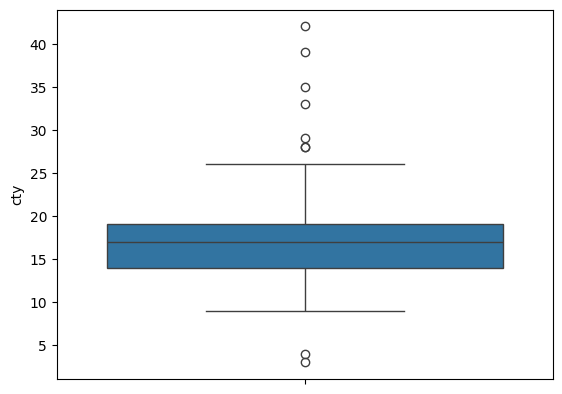

In [10]:
import seaborn as sns

# 상자그림 그려보기
sns.boxplot(data = mpg, y='cty')

<Axes: ylabel='cty'>

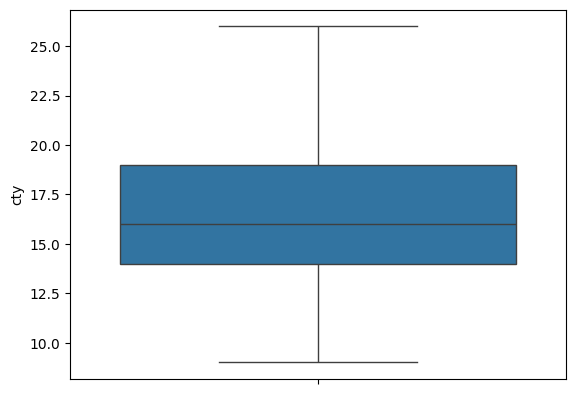

In [17]:
# 극단치 기준값 구하기
p25 = mpg['cty'].quantile(.25)
p75 = mpg['cty'].quantile(.75)
iqr = p75 - p25
ll = p25 - 1.5*iqr
ul = p75 + 1.5*iqr

# 극단치 결측 처리하기
mpg['cty'] = np.where((mpg['cty']<ll) | (mpg['cty']>ul), np.nan, mpg['cty'])

# 극단치 재확인
sns.boxplot(data = mpg, y='cty')

## 이상치3. 결측된 이상치 제거 후 drv 별 cty 평균 구하기

In [23]:
# df.dropna()를 이용해 결측치 제거
mpg00 = mpg.dropna(subset= ['drv', 'cty'])

# drv 그룹별 cty 평균 요약하기
mpg00.groupby('drv') \
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333


#### *→ 분석 결과 drv가 f, 4, r인 순서대로 cty의 평균이 높다.*